<a href="https://colab.research.google.com/github/ris0801/DeepLearning/blob/main/PytorchAndFashionMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import torch
import torchvision

In [ ]:
a = np.random.rand(2,3)
b = torch.from_numpy(a)

print(a)
print(b)
     

[[0.11463397 0.1134535  0.94464483]
 [0.82862788 0.16638008 0.04989895]]
tensor([[0.1146, 0.1135, 0.9446],
        [0.8286, 0.1664, 0.0499]], dtype=torch.float64)


In [ ]:
print(b + 10.0)
print()
print(torch.sin(b))
print()
print(b.sum())
print()
print(b.mean())
print()
print(b.shape)

tensor([[10.1146, 10.1135, 10.9446],
        [10.8286, 10.1664, 10.0499]], dtype=torch.float64)

tensor([[0.1144, 0.1132, 0.8103],
        [0.7370, 0.1656, 0.0499]], dtype=torch.float64)

tensor(2.2176, dtype=torch.float64)

tensor(0.3696, dtype=torch.float64)

torch.Size([2, 3])


In [ ]:
a = torch.rand(1,1,requires_grad = True)
print(a)
b = torch.rand(1,1)
print(b)

y = a + b
print(y)

tensor([[0.0084]], requires_grad=True)
tensor([[0.2295]])
tensor([[0.2379]], grad_fn=<AddBackward0>)


In [ ]:
y.backward()

In [ ]:
print("dy/da:", a.grad)

dy/da: tensor([[1.]])


In [ ]:
a = torch.rand(1,1,requires_grad = True)
b = torch.rand(1,1)
y = (a**2)*b

print(a)
print(b)
print(y)

y.backward()
print("dy/da:", a.grad)
print("dy/da:",2*a*b)

tensor([[0.5895]], requires_grad=True)
tensor([[0.7461]])
tensor([[0.2593]], grad_fn=<MulBackward0>)
dy/da: tensor([[0.8796]])
dy/da: tensor([[0.8796]], grad_fn=<MulBackward0>)


In [ ]:
A = torch.rand(2,2,requires_grad = True)
B = torch.rand(2,1)
C = torch.rand(2,1)

print("A:", A)
print("B:", B)
print("C:", C)

X = torch.matmul(A,B) + C
print("X:",X)

Z = X.sum()
print("Z:", Z)

Z.backward()
print(A.grad)
print(B)

A: tensor([[0.2174, 0.7086],
        [0.8088, 0.3988]], requires_grad=True)
B: tensor([[0.9576],
        [0.6538]])
C: tensor([[0.4858],
        [0.2939]])
X: tensor([[1.1573],
        [1.3292]], grad_fn=<AddBackward0>)
Z: tensor(2.4865, grad_fn=<SumBackward0>)
tensor([[0.9576, 0.6538],
        [0.9576, 0.6538]])
tensor([[0.9576],
        [0.6538]])


Training Simple Models

In [ ]:
trainingdata = torchvision.datasets.FashionMNIST('./FashionMNIST/',train=True,download=True,transform=torchvision.transforms.ToTensor())
testdata = torchvision.datasets.FashionMNIST('./FashionMNIST/',train=False,download=True,transform=torchvision.transforms.ToTensor())

In [ ]:
print(len(trainingdata))
print(len(testdata))     

60000
10000


In [ ]:
image, label = trainingdata[0]
print(image.shape, label)

torch.Size([1, 28, 28]) 9


In [ ]:
print(image.squeeze().shape)

torch.Size([28, 28])


In [ ]:
print(image.shape)

torch.Size([1, 28, 28])


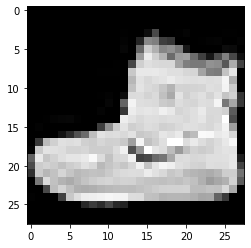

In [ ]:
import matplotlib.pyplot as plt 
%matplotlib inline
plt.imshow(image.squeeze(),cmap=plt.cm.gray)

Converting dataset to dataloader. 
It's nice for iterating over dataset

In [ ]:
#shuffling the trainData, common thing to do in neural network
trainDataLoader = torch.utils.data.DataLoader(trainingdata, batch_size = 64, shuffle = True)
# Why is shuffle false here?
testDataLoader = torch.utils.data.DataLoader(testdata, batch_size=64,shuffle = False)

In [ ]:
print(len(trainDataLoader))
print(len(testDataLoader))

938
157


In [ ]:
print(len(trainDataLoader) * 64)
print(len(testDataLoader) * 64)

60032
10048


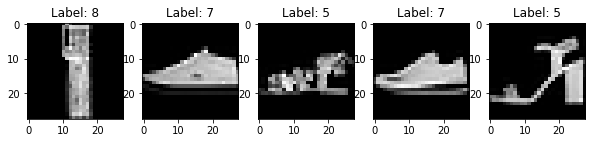

In [ ]:
#iter to create an iter object of trainDataLoader and next to get the first batch
images, labels = next(iter(trainDataLoader))

plt.figure(figsize=(10,4))
for index in np.arange(0,5):
  # This tells to create one row, five columns
  plt.subplot(1,5,index+1)
  plt.title(f'Label: {labels[index].item()}')
  plt.imshow(images[index].squeeze(),cmap=plt.cm.gray)

Setting up the model

In [ ]:
#pytorch is very object oriented, lot of times we start by creating a class
class LinearReg(torch.nn.Module):
  def __init__(self):
    super(LinearReg, self).__init__()
    # We are flattening the image into a linear vector
    # applies linear transformation on incoming data x 
    self.linear = torch.nn.Linear(28*28, 10)

  def forward(self,x):
    x = x.view(-1, 28*28)
    return self.linear(x)

#These are 3 steps in machine learning 
#1. Creating a model
# 2. Getting a loss function 
# 3. Running a optimizer to optimize the loss

#This is instanting the model and moving it over gpu 
model = LinearReg().cuda() # archictecture
# We need a measure of goodness
loss = torch.nn.CrossEntropyLoss() # loss
# Update the weights of matrix
optimizer = torch.optim.SGD(model.parameters(), lr=0.01) #training method

In [ ]:
train_loss_history = []
test_loss_history = []

# One epoch is passing over the training data once
# 20 epochs is passing over the entire data 20 times 
for epoch in range(20):
  train_loss = 0.0
  test_loss = 0.0
  
  #telling pytorch we are interested in updating the parameters
  model.train()
  for i, data in enumerate(trainDataLoader):
    images, labels = data
    #Because we have our model on GPU, we need to push images and label on 
    #GPU as well
    images = images.cuda()
    labels = labels.cuda()
    optimizer.zero_grad() # zero out any gradient values from the previous iteration
    predicted_output = model(images) # forward propagation  
    fit = loss(predicted_output, labels)  # calculate our measure of goodness
    fit.backward() # backpropagation
    optimizer.step() # update the weights of our trainable parameters
    train_loss += fit.item()

  # Setting to evaluation mode, so no gradients are computed 
  model.eval()
  for i, data in enumerate(testDataLoader):
    #Telling pytorch again to not compute any gradients
    with torch.no_grad():
      images, labels = data
      images = images.cuda()
      labels = labels.cuda()
      predicted_output = model(images)
      fit = loss(predicted_output, labels)
      test_loss += fit.item()
  train_loss = train_loss / len(trainDataLoader)
  test_loss = test_loss / len(testDataLoader)
  train_loss_history += [train_loss]
  test_loss_history += [test_loss]
  print(f'Epoch {epoch}, Train loss {train_loss}, Test loss {test_loss}')


Epoch 0, Train loss 0.9623264711040423, Test loss 0.7388534974900021
Epoch 1, Train loss 0.6676324252317201, Test loss 0.6477745501858414
Epoch 2, Train loss 0.6034518775146908, Test loss 0.6046121951880729
Epoch 3, Train loss 0.568652017157215, Test loss 0.5787125258309067
Epoch 4, Train loss 0.5455747268029622, Test loss 0.560371350710559
Epoch 5, Train loss 0.5291720433021659, Test loss 0.5462334188306408
Epoch 6, Train loss 0.5162577215415328, Test loss 0.5374249874786207
Epoch 7, Train loss 0.5061110629996003, Test loss 0.5281165255482789
Epoch 8, Train loss 0.49768437006707383, Test loss 0.5204960309016476
Epoch 9, Train loss 0.49050473523483096, Test loss 0.5148955790480231
Epoch 10, Train loss 0.4841089566538075, Test loss 0.5115069838086511
Epoch 11, Train loss 0.47885652086628017, Test loss 0.5070336711634497
Epoch 12, Train loss 0.47434465151860006, Test loss 0.5022328209345508
Epoch 13, Train loss 0.469925598549182, Test loss 0.49822540590717534
Epoch 14, Train loss 0.46602

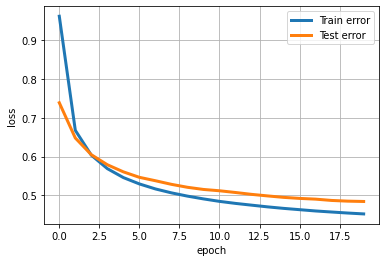

In [ ]:
plt.plot(range(20),train_loss_history,'-',linewidth=3,label='Train error')
plt.plot(range(20),test_loss_history,'-',linewidth=3,label='Test error')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
predicted_outputs = model(images)
predicted_classes = torch.max(predicted_outputs, 1)[1]
print('Predicted:', predicted_classes)
fit = loss(predicted_output, labels)
print('True labels:', labels)
print(fit.item())

Predicted: tensor([3, 1, 7, 5, 8, 2, 5, 6, 8, 9, 1, 9, 1, 8, 1, 5], device='cuda:0')
True labels: tensor([3, 2, 7, 5, 8, 4, 5, 6, 8, 9, 1, 9, 1, 8, 1, 5], device='cuda:0')
0.3279632329940796


Text(0.5, 1.0, 'Pred: 1, True: 2')

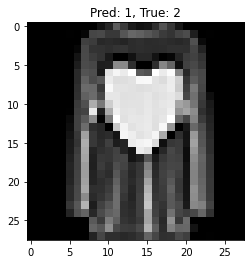

In [ ]:
plt.imshow(images[1].squeeze().cpu(), cmap=plt.cm.gray)
plt.title(f'Pred: {predicted_classes[1].item()}, True: {labels[1].item()}')